<p style="font-size:78px">Final Project IRWA (2024-2025)</p>

# Part 3: Ranking

In [2]:
# Standard library imports
import os
import sys

# Third-party imports
import pandas as pd
import numpy as np

# Local application imports
current_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in locals() else os.getcwd()
project_root = os.path.join(current_dir, '..')
if project_root not in sys.path:
    sys.path.append(project_root)
import irwa.loading as ild 
import irwa.preprocessing as ipp
import irwa.indexing as ind
import irwa.ranking as irk
import irwa.evaluation as eva

# The following lines allow for autoreload of modules. They allow changes in modules without the need to reload the kernel.
%load_ext autoreload
%autoreload 2

In [3]:
# Loading
file_path = '../data/farmers-protest-tweets.json'
tweets = ild.load_tweets_from_json(file_path)
print(f"Loaded {len(tweets)} tweets")

# Preprocessing
tweet_document_ids_map_df = "../data/tweet_document_ids_map.csv"
docid_to_tweetid, token_tweets = ipp.create_tokenized_dictionary(tweets, tweet_document_ids_map_df)
print(f"Loaded {len(token_tweets)} documents with their corresponding tokenized tweet content")

Loaded 117407 tweets
Loaded 48429 documents with their corresponding tokenized tweet content


### Query: What is the indian protest?

In [4]:
query = "What is the indian protest?"          

## a) Tf-idf

In [5]:
# Create inverted index
inverted_index, tf, idf = ind.create_inverted_index_tf_idf(token_tweets)

In [12]:
# Ranking results with TF-IDF
ranked_documents_tf_idf = irk.rank_documents_tf_idf(ipp.build_terms(query), token_tweets, inverted_index, tf, idf, document_filtering=irk.conjunctive_filtering)
irk.display_scores_tf_idf(ranked_documents_tf_idf, docid_to_tweetid, tweets, 20)

irk.save_scores_to_csv(ranked_documents_tf_idf, filename="../data/tf_idf_ranking.csv")

Top 20 Results:
------------------------------------------------------------
RESULT 1
Document doc_34729: 5.031061026856039
Content: Indian farmers' protests: Why they matter to British Indians
#FarmersProtest  https://t.co/kyCWnDVyEm
------------------------------------------------------------
RESULT 2
Document doc_19653: 4.865420574825832
Content: @PunYaab Farmers are Indian ... Each n every person in protest is Indian first ... So think before tweets against protesters 

#farmersprotest
------------------------------------------------------------
RESULT 3
Document doc_33904: 4.592709354323596
Content: Indian farmers' protests: Why they matter to British Indians

#FarmersStandingFirm #FarmersProtest #StandWithFarmers 

https://t.co/ywgPhLCvm9
------------------------------------------------------------
RESULT 4
Document doc_9676: 4.485696129303427
Content: This is why Indian Farmers are protesting #FarmersProtest https://t.co/9mzFBGQaXL
-----------------------------------------------

## b) Our score

In [13]:
ranked_documents_our_score_15 = irk.rank_documents_our_score(tweets, docid_to_tweetid, ranked_documents_tf_idf, alpha=0.15, k0 = 0.5, k1=0.5,k2=1,k3=0.5)
irk.display_scores_tf_idf(ranked_documents_our_score_15, docid_to_tweetid, tweets, 20)

irk.save_scores_to_csv(ranked_documents_our_score_15, filename="../data/our_score15_ranking.csv")

Top 20 Results:
------------------------------------------------------------
RESULT 1
Document doc_23286: 1.0
Content: Arresting #ClimateChange activist #DishaRavi is a huge mistake by Indian police ! It has now taken the #FarmersProtest to another level &amp; audience ! 

The human rights of all activists &amp; protesters must be respected ! 

#FreeDishaRavi !
------------------------------------------------------------
RESULT 2
Document doc_37376: 0.20108788453315748
Content: Indian #climate activist, Disha Ravi, aged 22, has been arrested after sharing a document intended to help farmers protest against new agricultural laws @fridays_india #FarmersProtest #FarmersProtests via @BBCWorld https://t.co/WgvMNMhbnj
------------------------------------------------------------
RESULT 3
Document doc_14687: 0.19865092408436588
Content: Indian 
#FarmersProtest
Largest protest in the world..
Support Farmers
✊✊
#MSP_किसान_का_हक
#DPstopIntimidatingFarmers https://t.co/NA5kGoTlEt
-----------------

In [14]:
ranked_documents_our_score_70 = irk.rank_documents_our_score(tweets, docid_to_tweetid, ranked_documents_tf_idf, alpha=0.7, k0 = 0.5, k1=0.5,k2=1,k3=0.5)
irk.display_scores_tf_idf(ranked_documents_our_score_70, docid_to_tweetid, tweets, 20)

irk.save_scores_to_csv(ranked_documents_our_score_70, filename="../data/our_score70_ranking.csv")

Top 20 Results:
------------------------------------------------------------
RESULT 1
Document doc_23286: 1.0
Content: Arresting #ClimateChange activist #DishaRavi is a huge mistake by Indian police ! It has now taken the #FarmersProtest to another level &amp; audience ! 

The human rights of all activists &amp; protesters must be respected ! 

#FreeDishaRavi !
------------------------------------------------------------
RESULT 2
Document doc_37376: 0.2012815491648457
Content: Indian #climate activist, Disha Ravi, aged 22, has been arrested after sharing a document intended to help farmers protest against new agricultural laws @fridays_india #FarmersProtest #FarmersProtests via @BBCWorld https://t.co/WgvMNMhbnj
------------------------------------------------------------
RESULT 3
Document doc_14687: 0.1994191975811419
Content: Indian 
#FarmersProtest
Largest protest in the world..
Support Farmers
✊✊
#MSP_किसान_का_हक
#DPstopIntimidatingFarmers https://t.co/NA5kGoTlEt
-------------------

## c) BM25

In [15]:
# Ranking results with TF-IDF
ranked_documents_bm25 = irk.rank_documents_bm25(ipp.build_terms(query), token_tweets, inverted_index, tf, idf)
irk.display_scores_tf_idf(ranked_documents_bm25, docid_to_tweetid, tweets, 20)

irk.save_scores_to_csv(ranked_documents_bm25, filename="../data/bm25_ranking.csv")

Top 20 Results:
------------------------------------------------------------
RESULT 1
Document doc_19653: 7.578828703860777
Content: @PunYaab Farmers are Indian ... Each n every person in protest is Indian first ... So think before tweets against protesters 

#farmersprotest
------------------------------------------------------------
RESULT 2
Document doc_34729: 7.556960017742792
Content: Indian farmers' protests: Why they matter to British Indians
#FarmersProtest  https://t.co/kyCWnDVyEm
------------------------------------------------------------
RESULT 3
Document doc_9676: 7.295058025055637
Content: This is why Indian Farmers are protesting #FarmersProtest https://t.co/9mzFBGQaXL
------------------------------------------------------------
RESULT 4
Document doc_33904: 7.178802751748759
Content: Indian farmers' protests: Why they matter to British Indians

#FarmersStandingFirm #FarmersProtest #StandWithFarmers 

https://t.co/ywgPhLCvm9
-----------------------------------------------

In [29]:
# Read the CSV files
df_tfidf = pd.read_csv("../data/tf_idf_ranking.csv")
df_our_score_15 = pd.read_csv("../data/our_score15_ranking.csv") 
df_our_score_70 = pd.read_csv("../data/our_score70_ranking.csv") 
df_bm25 = pd.read_csv("../data/bm25_ranking.csv")

# Rename the columns to reflect the ranking method.
df_tfidf.columns = ['document_id', 'tf_idf']
df_our_score_15.columns = ['document_id', 'our_score_15']
df_our_score_70.columns = ['document_id', 'our_score_70']
df_bm25.columns = ['document_id', 'bm25']

In [30]:
# Convert score columns to numeric types
df_tfidf['tf_idf'] = pd.to_numeric(df_tfidf['tf_idf'], errors='coerce')
df_our_score_15['our_score_15'] = pd.to_numeric(df_our_score_15['our_score_15'], errors='coerce')
df_our_score_70['our_score_70'] = pd.to_numeric(df_our_score_70['our_score_70'], errors='coerce')
df_bm25['bm25'] = pd.to_numeric(df_bm25['bm25'], errors='coerce')

# Get the top 20 documents for each ranking method
top_tfidf = df_tfidf.nlargest(20, 'tf_idf')[['document_id', 'tf_idf']]
top_our_score_15 = df_our_score_15.nlargest(20, 'our_score_15')[['document_id', 'our_score_15']]
top_our_score_70 = df_our_score_70.nlargest(20, 'our_score_70')[['document_id', 'our_score_70']]
top_bm25 = df_bm25.nlargest(20, 'bm25')[['document_id', 'bm25']]

# Merge the top documents into a single DataFrame
merged_df = top_tfidf.merge(top_our_score_15, on='document_id', how='outer')
merged_df = merged_df.merge(top_our_score_70, on='document_id', how='outer')
merged_df = merged_df.merge(top_bm25, on='document_id', how='outer')

# Fill NaN values with zeros or a placeholder
merged_df.fillna(0, inplace=True)

# Reset index and create rank column
merged_df.reset_index(drop=True, inplace=True)
merged_df['rank'] = merged_df.index + 1  # Starting rank from 1

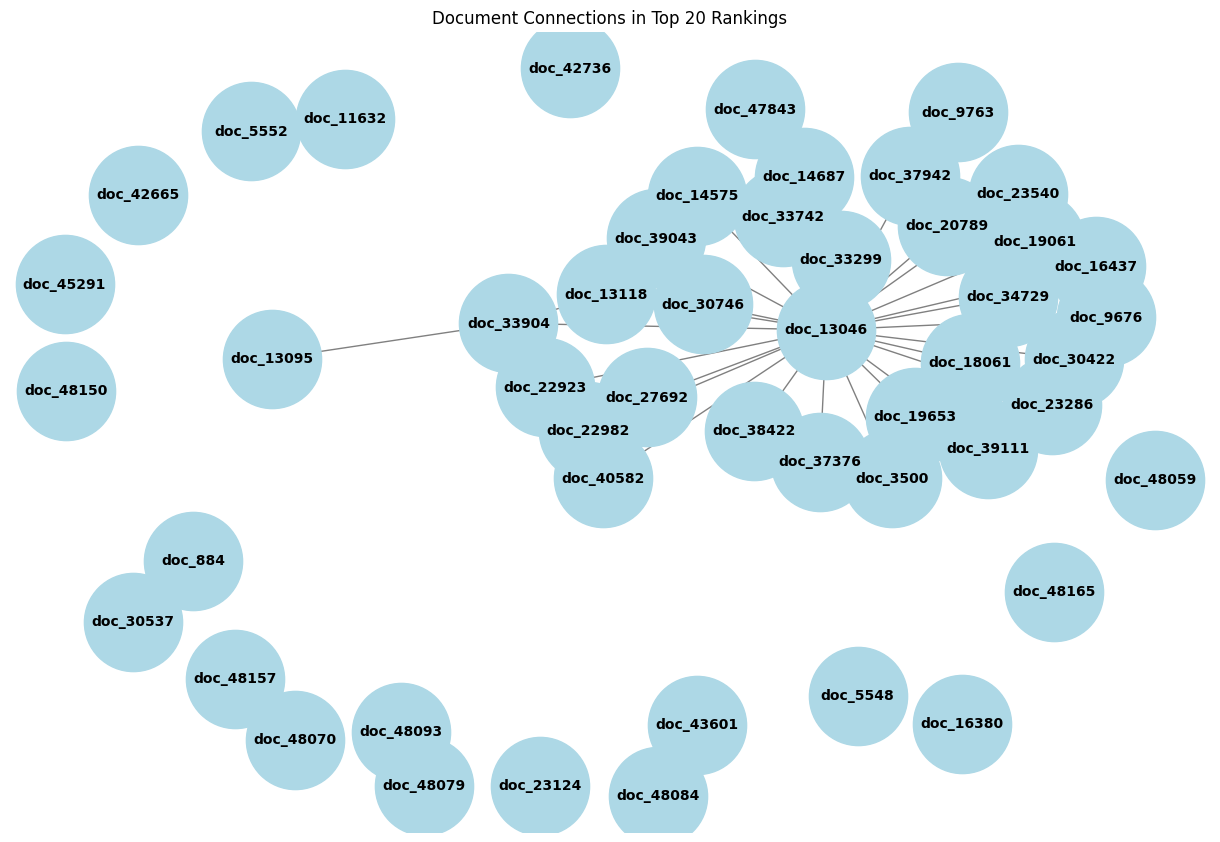

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes and edges based on shared documents
for index, row in merged_df.iterrows():
    # Check if the document ID appears in multiple ranking methods
    document_id = row['document_id']
    
    # Add the document as a node
    G.add_node(document_id)
    
    # Add edges if a document is present in the top 20 of more than one ranking method
    scores = [row['tf_idf'], row['our_score_15'], row['our_score_70'], row['bm25']]
    
    # Get the non-zero scores
    non_zero_scores = [score for score in scores if score > 0]
    
    # If more than one score is non-zero, create edges
    if len(non_zero_scores) > 1:
        for i in range(len(non_zero_scores)):
            for j in range(i + 1, len(non_zero_scores)):
                G.add_edge(document_id, merged_df.iloc[j]['document_id'])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)  # Positioning algorithm
nx.draw(G, pos, with_labels=True, node_size=5000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title("Document Connections in Top 20 Rankings")
plt.show()

# Word2vec